**Phase 0 - Data Preparation**

**Import The Necessary Library**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_breast_cancer


**Import The Breast Cancer Dataset From The SKLearn Library**

In [ ]:
data = load_breast_cancer()

**Convert The SkLearn Bunch Object To Pandas DataFrame**

In [ ]:
dataset = pd.DataFrame(data.data, data.target, columns = data.feature_names)
dataset['target'] = data.target

In [ ]:
dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
1,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


**Data Exploration**

In [ ]:
X = dataset.iloc[:, 0:29].values
Y = dataset.iloc[:, 30].values

In [ ]:
print('Breast Cancer Dataset Dimensions: {}'.format(dataset.shape))

Breast Cancer Dataset Dimensions: (569, 31)


**The Number Of Patients Who Have Cancer Versus Those Who Do Not Have Cancer**

In [ ]:
dataset['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

**1 - Benign; 0 - Malignant**

**Visualizing The Data**

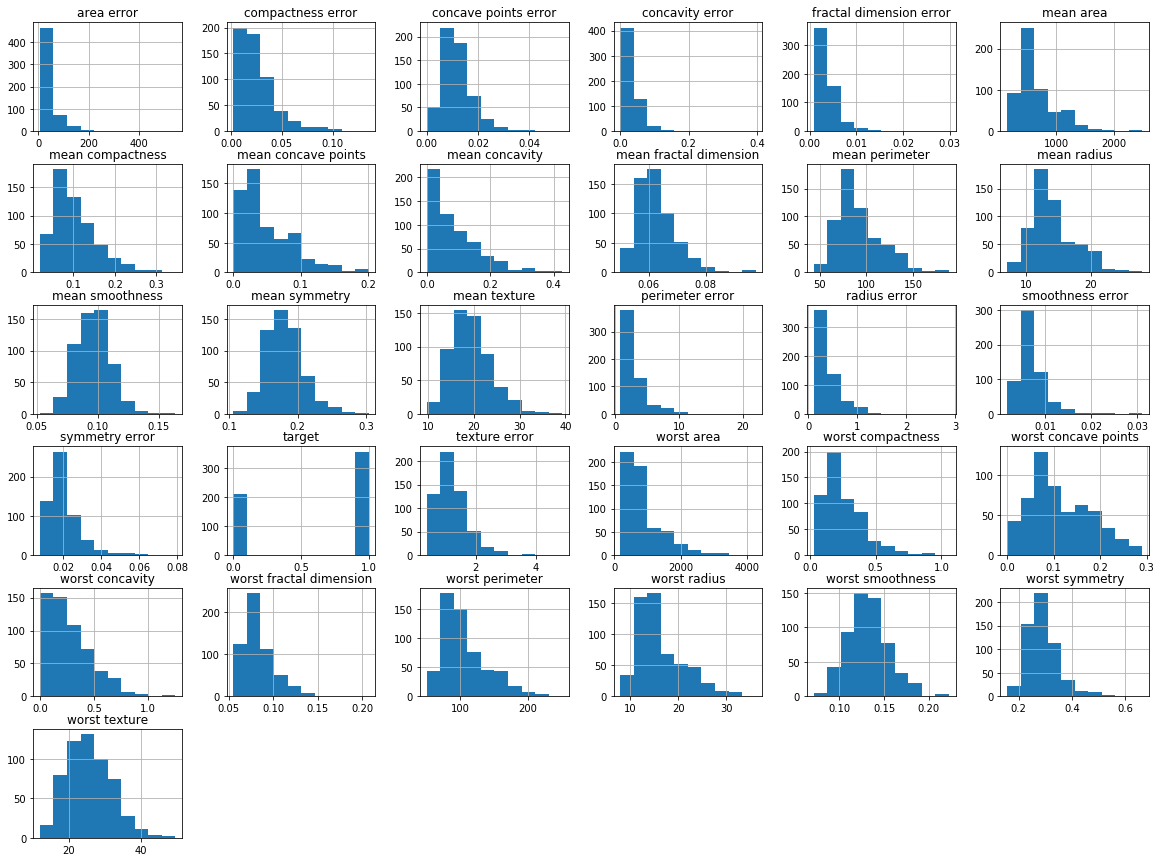

In [ ]:
num_bins = 10
dataset.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

**Finding Missing Data**

In [ ]:
dataset.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [ ]:
dataset.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

**Splitting The Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, 
                                                    random_state = 0)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Using Logistic Regression To Train The Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
Y_pred = classifier.predict(X_test)

**Compute Accuracy Of Logistic Regression**

In [ ]:
import seaborn as sns
def seaborn_plot_cm(cm, model_name):
  sns.heatmap(cm, annot = True, fmt = '.2f', 
            xticklabels = ['Benign', 'Malignant'], yticklabels = ['Benign', 'Malignant'])
  plt.ylabel('True Class')
  plt.xlabel('Predicted Class')

  plt.title(model_name)
  plt.savefig(model_name)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def print_classification_report(classifier_name, Y_pred, Y_test):
  print(classifier_name + ' Accuracy: {:.3f}'.format(accuracy_score(Y_test, 
                                                                   Y_pred)))

  cm = confusion_matrix(Y_test, Y_pred)
  print(classification_report(Y_test, Y_pred))
  seaborn_plot_cm(cm, classifier_name)

Logistic Regression Accuracy: 0.951
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        53
           1       0.97      0.96      0.96        90

   micro avg       0.95      0.95      0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



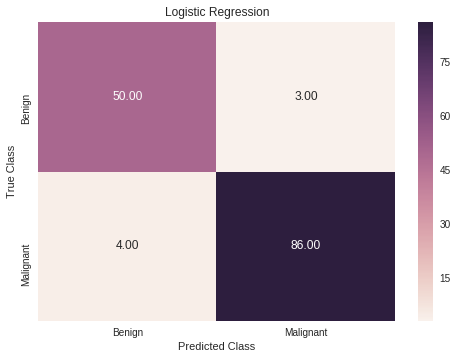

In [ ]:
print_classification_report('Logistic Regression', Y_pred, Y_test)

**Using KNearest Neighbors To Train The Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kneighbors_classifier = KNeighborsClassifier(n_neighbors = 5, 
                                             metric = 'minkowski', p = 2)

kneighbors_classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
kNeighbors_Y_pred = kneighbors_classifier.predict(X_test)

KNeighbors Accuracy: 0.951
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        53
           1       0.94      0.99      0.96        90

   micro avg       0.95      0.95      0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



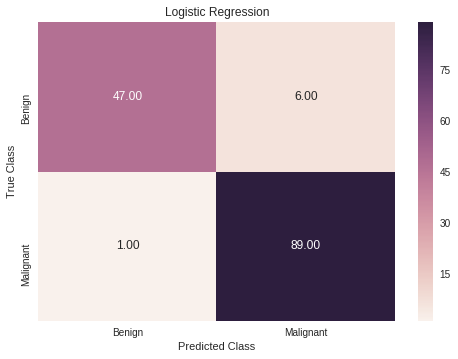

In [ ]:
print_classification_report('KNeighbors', kNeighbors_Y_pred, Y_test)

**Using SVM To Train The Model**

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
svm_Y_pred = svm_classifier.predict(X_test)

SVM Accuracy: 0.958
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.98      0.96      0.97        90

   micro avg       0.96      0.96      0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



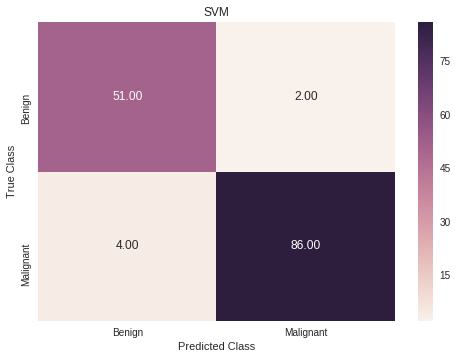

In [ ]:
print_classification_report('SVM', svm_Y_pred, Y_test)

**Using Gaussian Naive Bayes To Train The Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gbNB_classifier = GaussianNB()

gbNB_classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Gaussian Naive Bayes Accuracy: 0.944
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        53
           1       0.95      0.97      0.96        90

   micro avg       0.94      0.94      0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



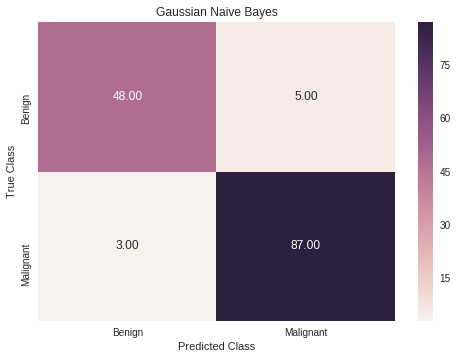

In [ ]:
gb_NB_Y_pred = gbNB_classifier.predict(X_test)
print_classification_report('Gaussian Naive Bayes', gb_NB_Y_pred, Y_test)

**Using Decision Tree To Train The Model**

Decision Tree Accuracy: 0.916
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        53
           1       0.95      0.91      0.93        90

   micro avg       0.92      0.92      0.92       143
   macro avg       0.91      0.92      0.91       143
weighted avg       0.92      0.92      0.92       143



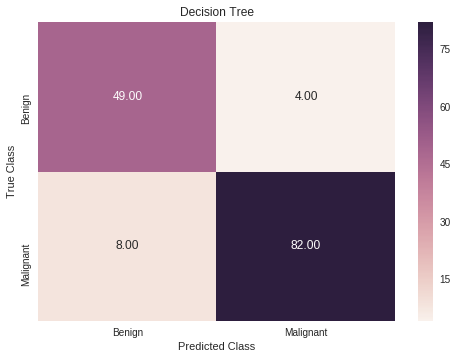

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc_tree_classifier = DecisionTreeClassifier()

dc_tree_classifier.fit(X_train, Y_train)

dc_tree_Y_pred = dc_tree_classifier.predict(X_test)
print_classification_report('Decision Tree', dc_tree_Y_pred, Y_test)

**Using Random Forest To Train The Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rd_forest_classifier = RandomForestClassifier(n_estimators = 10, 
                                              criterion = 'entropy', 
                                              random_state = 0)

rd_forest_classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Random Forest Accuracy: 0.958
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        53
           1       0.99      0.94      0.97        90

   micro avg       0.96      0.96      0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



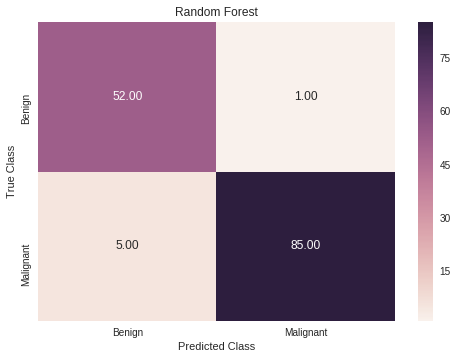

In [ ]:
rd_forest_Y_pred = rd_forest_classifier.predict(X_test)
print_classification_report('Random Forest', rd_forest_Y_pred, Y_test)